This is the second task. Firstly I am calculating median of all the cued and uncued files group by eccentricities and emotions. It results in a csv file named "combined_response_time_by_condition"

In [19]:
import os
import pandas as pd

# base folder path
base_folder = r'C:\Users\hp\OneDrive\Pictures\Desktop\ATP_A2\D2-8'

# List to collect all processed DataFrames
all_data = []

# Loop over each participant
for participant in os.listdir(base_folder):
    participant_path = os.path.join(base_folder, participant)

    if os.path.isdir(participant_path):
        for experiment in ['E1', 'E2', 'E3']:
            experiment_path = os.path.join(participant_path, experiment)

            if os.path.isdir(experiment_path):
                # Read cued file
                cued_path = os.path.join(experiment_path, 'refined_cued.csv')
                if os.path.exists(cued_path):
                    cued_df = pd.read_csv(cued_path)
                    cued_df['condition'] = 'cued'
                else:
                    cued_df = pd.DataFrame()

                # Read uncued file
                uncued_path = os.path.join(experiment_path, 'refined_uncued.csv')
                if os.path.exists(uncued_path):
                    uncued_df = pd.read_csv(uncued_path)
                    uncued_df['condition'] = 'uncued'
                else:
                    uncued_df = pd.DataFrame()

                # Combine both cued and uncued
                combined = pd.concat([cued_df, uncued_df], ignore_index=True)

                if not combined.empty:
                    combined['participant'] = participant
                    combined['experiment'] = experiment

                    if 'cue_location' in combined.columns and 'response_time' in combined.columns:
                        grouped = combined.groupby(['cue_location', 'condition', 'participant', 'experiment'])['response_time'].median().reset_index()
                        all_data.append(grouped)

# Final merge and save
if all_data:
    final_df = pd.concat(all_data, ignore_index=True)
    final_df.to_csv('combined_response_time_by_condition.csv', index=False)
    print(" File saved as 'combined_response_time_by_condition.csv'")
else:
    print(" No data found. ")


 File saved as 'combined_response_time_by_condition.csv'


Then I am Creating two plot showing the Reaction Time for the experiments. One plot is for
cued(valid) trials and another is for uncued (invalid) trials.

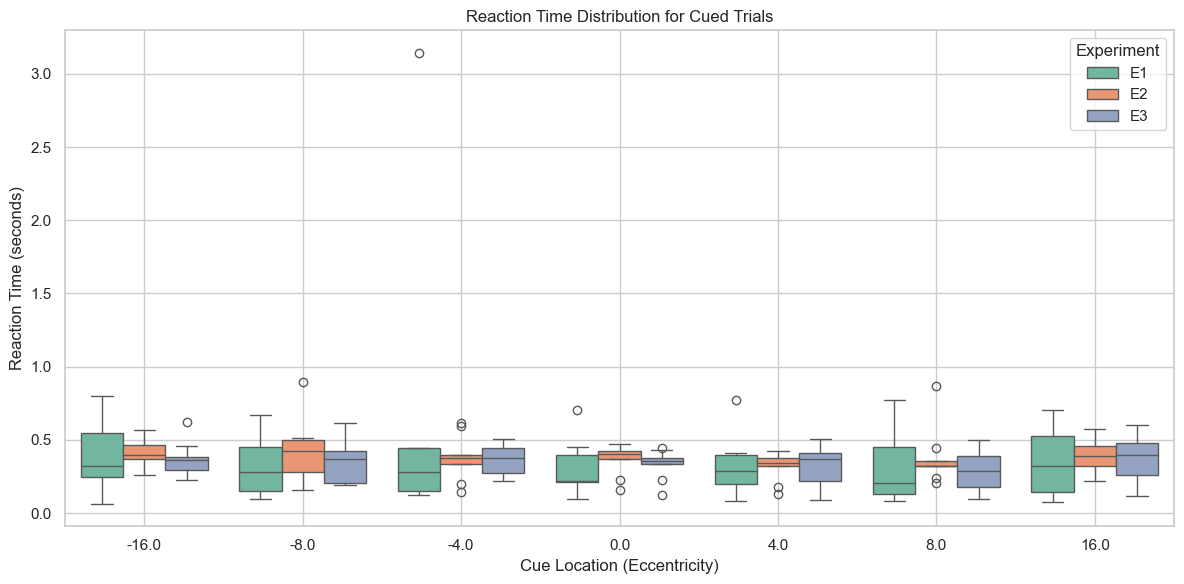

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('combined_response_time_by_condition.csv')

# Convert cue_location to numeric
df['cue_location'] = pd.to_numeric(df['cue_location'], errors='coerce')

# Set the plot style
sns.set(style="whitegrid")

# Function to generate box plot
def plot_box_by_condition(df, condition_label):
    # Filter the data
    condition_df = df[df['condition'] == condition_label]

    # Create boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        data=condition_df,
        x='cue_location',
        y='response_time',
        hue='experiment',
        palette='Set2'
    )

    plt.title(f'Reaction Time Distribution for {condition_label.capitalize()} Trials')
    plt.xlabel('Cue Location (Eccentricity)')
    plt.ylabel('Reaction Time (seconds)')
    plt.legend(title='Experiment')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot for cued
plot_box_by_condition(df, 'cued')

# Plot for uncued
plot_box_by_condition(df, 'uncued')
